<a href="https://colab.research.google.com/github/javahedi/project-On-GoogleColab/blob/main/cnn_CelebA_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations

### First, let's laod data

In [ ]:
# loading the dataset
import torch
import torchvision 
from torchvision import transforms

image_path = './'


celebA_train_datset = torchvision.datasets.CelebA(
    root=image_path, split = 'train',
    target_type = 'attr', download=True
)


celebA_valid_datset = torchvision.datasets.CelebA(
    root=image_path, split = 'valid',
    target_type = 'attr', download=True
)


celebA_test_datset = torchvision.datasets.CelebA(
    root=image_path, split = 'test',
    target_type = 'attr', download=True
)


RuntimeError: ignored

# second way to download data 

url : https://drive.google.com/file/d/1m8-EBPgi5MRubrm6iQjafK2QMHDBMSfJ/view

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gdown
# a file
url = "https://drive.google.com/file/d/1m8-EBPgi5MRubrm6iQjafK2QMHDBMSfJ/view"
output = "celeba.zip"
gdown.download(url, output, fuzzy=True, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1m8-EBPgi5MRubrm6iQjafK2QMHDBMSfJ
To: /content/celeba.zip
100%|██████████| 1.31G/1.31G [00:13<00:00, 97.9MB/s]


'celeba.zip'

In [ ]:
!pwd

/content


In [ ]:
!unzip celeba.zip

Archive:  celeba.zip
   creating: celeba/
  inflating: celeba/img_align_celeba.zip  
  inflating: __MACOSX/celeba/._img_align_celeba.zip  
  inflating: celeba/list_attr_celeba.txt  
  inflating: __MACOSX/celeba/._list_attr_celeba.txt  
  inflating: celeba/.DS_Store        
  inflating: __MACOSX/celeba/._.DS_Store  
  inflating: celeba/list_bbox_celeba.txt  
  inflating: __MACOSX/celeba/._list_bbox_celeba.txt  
  inflating: celeba/list_landmarks_align_celeba.txt  
  inflating: __MACOSX/celeba/._list_landmarks_align_celeba.txt  
  inflating: celeba/list_landmarks_celeba.txt  
  inflating: __MACOSX/celeba/._list_landmarks_celeba.txt  
  inflating: celeba/list_eval_partition.txt  
  inflating: __MACOSX/celeba/._list_eval_partition.txt  
  inflating: celeba/identity_CelebA.txt  
  inflating: __MACOSX/celeba/._identity_CelebA.txt  


In [ ]:
!rm -r __MACOSX/ celeba.zip

In [ ]:
#!unzip -qq   --> verbose off
!unzip -qq celeba/img_align_celeba.zip

In [ ]:
!mv -f img_align_celeba/ celeba

In [ ]:
!du -sh *

1.8G	celeba
55M	sample_data


In [ ]:
import torchvision 

image_path = './'
celeba_train_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=False)
celeba_valid_dataset = torchvision.datasets.CelebA(image_path, split='valid', target_type='attr', download=False)
celeba_test_dataset = torchvision.datasets.CelebA(image_path, split='test', target_type='attr', download=False)

print('Train set:', len(celeba_train_dataset))
print('Validation set:', len(celeba_valid_dataset))
print('Test set:', len(celeba_test_dataset))

Train set: 162770
Validation set: 19867
Test set: 19962


- Image Transformation
  > croppin, filtering, changinf the contrast, brightness, ..
- Data Augmentaion 
  > broad set of techniques for dealing whith cases with limited train set 
  > certain data augmentaion allow us to modify or even artificially syntesize more data

In [ ]:
type(celeba_train_dataset)

torchvision.datasets.celeba.CelebA

In [ ]:
celeba_train_dataset[0]

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7F8A103F4310>,
 tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
         1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))

In [ ]:
! du -sh celeba/*

3.3M	celeba/identity_CelebA.txt
1.7G	celeba/img_align_celeba
26M	celeba/list_attr_celeba.txt
5.9M	celeba/list_bbox_celeba.txt
2.8M	celeba/list_eval_partition.txt
12M	celeba/list_landmarks_align_celeba.txt
12M	celeba/list_landmarks_celeba.txt


In [ ]:
import pandas as pd
columns = ['id','5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 
           'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
           'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 
           'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 
           'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 
           'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 
           'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 
           'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 
           'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
           'Wearing_Necktie', 'Young']

print(len(columns))

list_attr_celeba =  pd.read_csv('/content/celeba/list_attr_celeba.txt',skiprows=2, names=columns, sep='\s+')
list_attr_celeba.head()

41


,id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
import numpy as np
list_attr_celeba[columns[1:]] = np.where(list_attr_celeba[columns[1:]] == -1, 0, 1)

In [ ]:
list_attr_celeba.head()

,id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


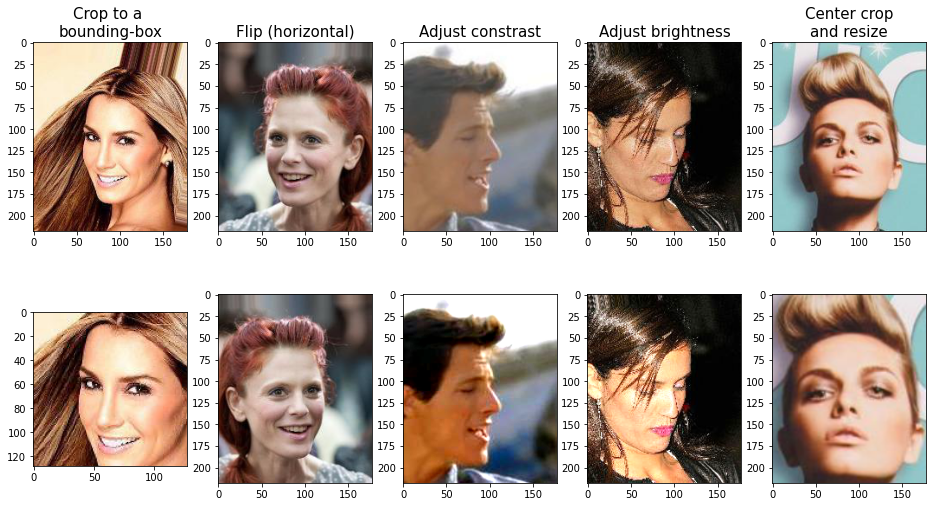

In [ ]:
from torchvision import transforms 
import matplotlib.pyplot as plt

## take 5 examples

fig = plt.figure(figsize=(16, 8.5))

## Column 1: cropping to a bounding-box
ax = fig.add_subplot(2, 5, 1)
img, attr = celeba_train_dataset[0]
ax.set_title('Crop to a \nbounding-box', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 6)
img_cropped = transforms.functional.crop(img, 50, 20, 128, 128)
ax.imshow(img_cropped)

## Column 2: flipping (horizontally)
ax = fig.add_subplot(2, 5, 2)
img, attr = celeba_train_dataset[1]
ax.set_title('Flip (horizontal)', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 7)
img_flipped = transforms.functional.hflip(img)
ax.imshow(img_flipped)

## Column 3: adjust contrast
ax = fig.add_subplot(2, 5, 3)
img, attr = celeba_train_dataset[2]
ax.set_title('Adjust constrast', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 8)
img_adj_contrast = transforms.functional.adjust_contrast(img, contrast_factor=2)
ax.imshow(img_adj_contrast)

## Column 4: adjust brightness
ax = fig.add_subplot(2, 5, 4)
img, attr = celeba_train_dataset[3]
ax.set_title('Adjust brightness', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 9)
img_adj_brightness = transforms.functional.adjust_brightness(img, brightness_factor=1.3)
ax.imshow(img_adj_brightness)

## Column 5: cropping from image center 
ax = fig.add_subplot(2, 5, 5)
img, attr = celeba_train_dataset[4]
ax.set_title('Center crop\nand resize', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 10)
img_center_crop = transforms.functional.center_crop(img, [0.7*218, 0.7*178])
img_resized = transforms.functional.resize(img_center_crop, size=(218, 178))
ax.imshow(img_resized)
 
# plt.savefig('figures/14_14.png', dpi=300)
plt.show()

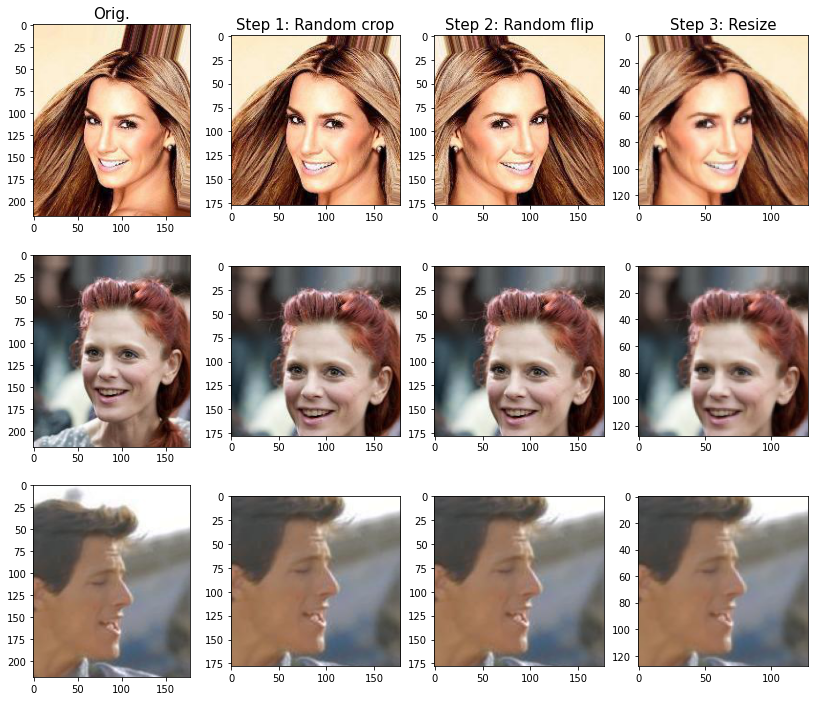

In [ ]:
torch.manual_seed(1)

fig = plt.figure(figsize=(14, 12))

for i, (img, attr) in enumerate(celeba_train_dataset):
    ax = fig.add_subplot(3, 4, i*4+1)
    ax.imshow(img)
    if i == 0:
        ax.set_title('Orig.', size=15)
        
    ax = fig.add_subplot(3, 4, i*4+2)
    img_transform = transforms.Compose([transforms.RandomCrop([178, 178])])
    img_cropped = img_transform(img)
    ax.imshow(img_cropped)
    if i == 0:
        ax.set_title('Step 1: Random crop', size=15)

    ax = fig.add_subplot(3, 4, i*4+3)
    img_transform = transforms.Compose([transforms.RandomHorizontalFlip()])
    img_flip = img_transform(img_cropped)
    ax.imshow(img_flip)
    if i == 0:
        ax.set_title('Step 2: Random flip', size=15)

    ax = fig.add_subplot(3, 4, i*4+4)
    img_resized = transforms.functional.resize(img_flip, size=(128, 128))
    ax.imshow(img_resized)
    if i == 0:
        ax.set_title('Step 3: Resize', size=15)
    
    if i == 2:
        break
        
# plt.savefig('figures/14_15.png', dpi=300)
plt.show()

lets define a transformation function to use this pipline for augmentation pipline 

In [ ]:
get_smile = lambda attr: attr[18]

we define **transform_train** function
  1. randomly crop
  2. flip randomly
  3. resize to $64\times64$


In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop([178,178]),
    transforms.RandomHorizontalFlip(),
    transforms.Resize([64,64]),
    transforms.ToTensor(),
])

we only apply data augmentation to th training examples, and not to "Validation" and "test"

In [ ]:
transform = transforms.Compose([
    transforms.CenterCrop([178,178]),
    transforms.Resize([64,64]),
    transforms.ToTensor(),
])

now, to see data augmantaion in action, let's apply ```transform_train```

In [ ]:
from torch.utils.data import DataLoader

celeba_train_dataset = torchvision.datasets.CelebA(image_path, 
                                                   split='train', 
                                                   target_type='attr', 
                                                   download=False, 
                                                   transform=transform_train,
                                                   target_transform=get_smile)

torch.manual_seed(1)
data_loader = DataLoader(celeba_train_dataset, batch_size=2)

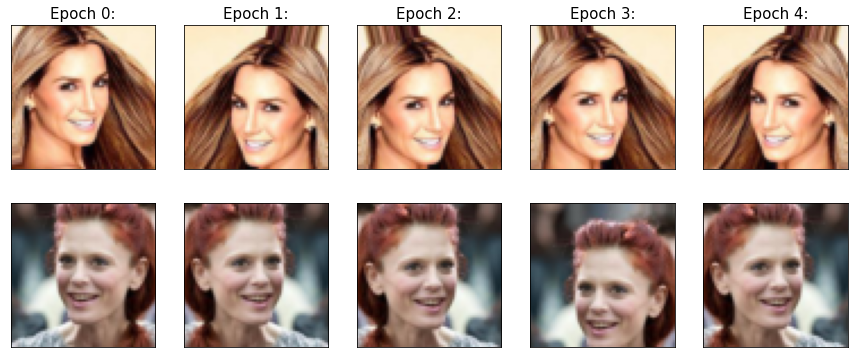

In [ ]:
fig = plt.figure(figsize=(15, 6))

num_epochs = 5
for j in range(num_epochs):
    img_batch, label_batch = next(iter(data_loader))
    img = img_batch[0]
    ax = fig.add_subplot(2, 5, j + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Epoch {j}:', size=15)
    ax.imshow(img.permute(1, 2, 0))

    img = img_batch[1]
    ax = fig.add_subplot(2, 5, j + 6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img.permute(1, 2, 0))
      
    
#plt.savefig('figures/14_16.png', dpi=300)
plt.show()

In [ ]:
celeba_valid_dataset = torchvision.datasets.CelebA(image_path, 
                                                   split='valid', 
                                                   target_type='attr', 
                                                   download=False, 
                                                   transform=transform,
                                                   target_transform=get_smile)

celeba_test_dataset = torchvision.datasets.CelebA(image_path, 
                                                   split='test', 
                                                   target_type='attr', 
                                                   download=False, 
                                                   transform=transform,
                                                   target_transform=get_smile)


In [ ]:
# use small subset to make cpu time less :-)
from torch.utils.data import Subset
celeba_train_dataset = Subset(celeba_train_dataset, torch.arange(16000)) 
celeba_valid_dataset = Subset(celeba_valid_dataset, torch.arange(1000)) 
 
print('Train set:', len(celeba_train_dataset))
print('Validation set:', len(celeba_valid_dataset))

Train set: 16000
Validation set: 1000


In [ ]:
# now create Loader for three datsets

batch_size = 32
torch.manual_seed(1)

train_dl = DataLoader(celeba_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(celeba_valid_dataset, batch_size, shuffle=True)
test_dl  = DataLoader(celeba_test_dataset, batch_size, shuffle=True)


### train a CNN smile classifier

- input image  size $3\times64\times64$
- input goes through 4 cnn layes with 32, 64, 128 and 256 feature
- max-pool (2,2)
- two dropout layers for regulaization

In [ ]:
from importlib import invalidate_caches
import torch.nn as nn 

model = nn.Sequential()

model.add_module('conv1', nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model.add_module('dropout1', nn.Dropout(p=0.5))


model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))
model.add_module('dropout2', nn.Dropout(p=0.5))


model.add_module('conv3', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1))
model.add_module('relu3', nn.ReLU())
model.add_module('pool3', nn.MaxPool2d(kernel_size=2))



model.add_module('conv4', nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1))
model.add_module('relu4', nn.ReLU())


In [ ]:
# lets see the shape of feature maps 

x = torch.ones([4, 3, 64, 64])
model(x).shape

torch.Size([4, 256, 8, 8])

- there are 256 feature maps with iamge size $8\times8$
- number of flatten input for fully-connected layer $8\times8\times256=16384$
- let's ad a layer ```global average-pooling```, pooling size is eqaul to the size of feature maps
- computes the average of each feature maps separately, 
- reducing the hidding units to 256

In [ ]:
model.add_module('pool4', nn.AvgPool2d(kernel_size= 8))
model.add_module('flatten', nn.Flatten())

In [ ]:
# lets see the shape of feature maps 

x = torch.ones([4, 3, 64, 64])
model(x).shape

torch.Size([4, 256])

- now, add fully connected layer, to get output unit,
- we specifiy the "sigmoid" activation fuction

In [ ]:
model.add_module('fc', nn.Linear(256,1))
model.add_module('sigmoid', nn.Sigmoid())

In [ ]:
# lets see the shape of feature maps 

x = torch.ones([4, 3, 64, 64])
model(x).shape

torch.Size([4, 1])

In [ ]:
model

Sequential(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (pool4): AvgPool2d(kernel_size=8, stride=8, padding=0)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

## we aim a Binary-Classification

In [ ]:
device = torch.device("cuda")
#device = torch.device("cpu")
model = model.to(device) 

In [ ]:
los_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train     = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid     = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs

    for epoch in range(num_epochs):
        model.train()

        for x_batch, y_batch in train_dl:
          
            x_batch = x_batch.to(device) 
            y_batch = y_batch.to(device) 

            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch.float())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch]     /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device) 
                y_batch = y_batch.to(device) 
                pred = model(x_batch)[:, 0]
                loss = loss_fn(pred, y_batch.float())
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0) 
                is_correct = ((pred>=0.5).float() == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        
        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid


In [ ]:
%timeit
torch.manual_seed(1)
num_epochs = 30
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.6211 val_accuracy: 0.7070
Epoch 2 accuracy: 0.7017 val_accuracy: 0.7500
Epoch 3 accuracy: 0.7219 val_accuracy: 0.7550
Epoch 4 accuracy: 0.7368 val_accuracy: 0.7860
Epoch 5 accuracy: 0.7448 val_accuracy: 0.7770
Epoch 6 accuracy: 0.7605 val_accuracy: 0.7870
Epoch 7 accuracy: 0.7704 val_accuracy: 0.8090
Epoch 8 accuracy: 0.7911 val_accuracy: 0.8100
Epoch 9 accuracy: 0.8102 val_accuracy: 0.8450
Epoch 10 accuracy: 0.8200 val_accuracy: 0.8380
Epoch 11 accuracy: 0.8311 val_accuracy: 0.8650
Epoch 12 accuracy: 0.8429 val_accuracy: 0.8530
Epoch 13 accuracy: 0.8461 val_accuracy: 0.8160
Epoch 14 accuracy: 0.8516 val_accuracy: 0.8510
Epoch 15 accuracy: 0.8541 val_accuracy: 0.8580
Epoch 16 accuracy: 0.8567 val_accuracy: 0.8450
Epoch 17 accuracy: 0.8565 val_accuracy: 0.8380
Epoch 18 accuracy: 0.8606 val_accuracy: 0.8760
Epoch 19 accuracy: 0.8617 val_accuracy: 0.8680
Epoch 20 accuracy: 0.8607 val_accuracy: 0.8800
Epoch 21 accuracy: 0.8674 val_accuracy: 0.8620
Epoch 22 accuracy: 0.8

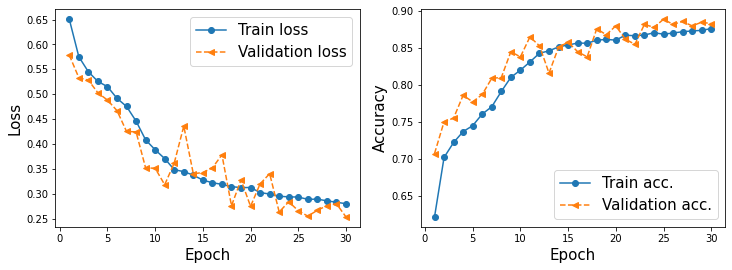

In [ ]:
x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/14_17.png', dpi=300)
plt.show()

### evaluate mode on test set

In [ ]:
accuracy_test = 0

model.eval()
with torch.no_grad():
    for x_batch, y_batch in test_dl:
        x_batch = x_batch.to(device) 
        y_batch = y_batch.to(device) 
        pred = model(x_batch)[:, 0]
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_test += is_correct.sum().cpu()
 
accuracy_test /= len(test_dl.dataset)
        
print(f'Test accuracy: {accuracy_test:.4f}') 

Test accuracy: 0.8748


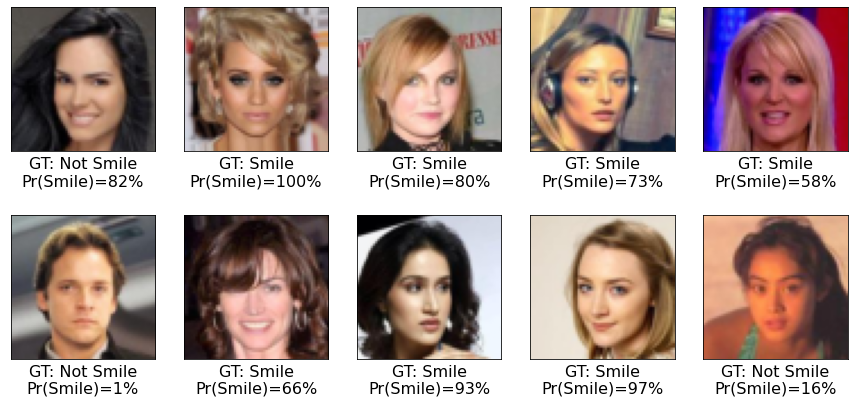

In [ ]:
pred = model(x_batch)[:, 0] * 100. # sigmoid out is based on probability

fig = plt.figure(figsize=(15, 7))
for j in range(10, 20):
    ax = fig.add_subplot(2, 5, j-10+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(x_batch[j].cpu().permute(1, 2, 0))
    if y_batch[j] == 1:
        label = 'Smile'
    else:
        label = 'Not Smile'
    ax.text(
        0.5, -0.15, 
        f'GT: {label:s}\nPr(Smile)={pred[j]:.0f}%', 
        size=16, 
        horizontalalignment='center',
        verticalalignment='center', 
        transform=ax.transAxes)
    
#plt.savefig('figures/figures-14_18.png', dpi=300)
plt.show()